Import Libraries

In [42]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import os

Use glob to grab files 0-9

In [43]:
files = glob.glob("states*.csv")
print(files)

['states0.csv', 'states8.csv', 'states9.csv', 'states7.csv', 'states5.csv', 'states2.csv', 'states4.csv', 'states3.csv', 'states6.csv', 'states1.csv']


Loop through the files and read into DataFrames

In [44]:
df_list = [pd.read_csv(file) for file in files]

Concatenate files together

In [45]:
us_census = pd.concat(df_list, ignore_index=True)

Preview the DataFrame

In [46]:
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


Print column names and data types

In [47]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [48]:
print(us_census.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


Remove "$" and "," from Income column, using regex. Convert Income column to numeric

In [49]:
us_census['Income'] = us_census['Income'].str.replace('$','', regex=False)

In [50]:
us_census['Income'] = us_census['Income'].str.replace(',', '', regex=False)

In [51]:
us_census['Income'] = pd.to_numeric(us_census['Income'])

Split GenderPop column into Men and Women. Remove the trailing M and F

In [52]:
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split('_', expand=True)

In [53]:
us_census['Men'] = us_census['Men'].str.replace('M', '', regex=False)
us_census['Women'] = us_census['Women'].str.replace('F', '', regex=False)

Convert Income column to numeric

In [54]:
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

# Make a scatterplot of Relationship Between Income and Female Population

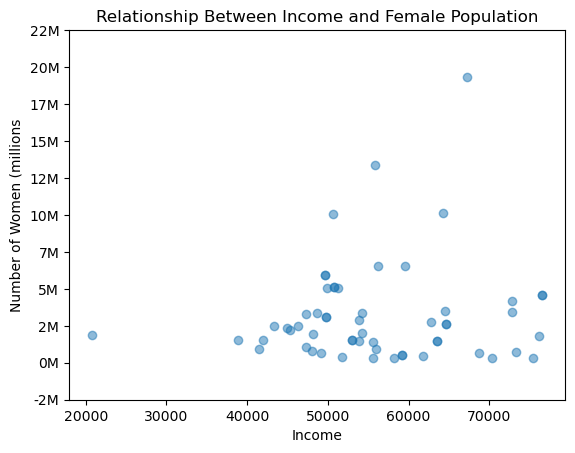

In [55]:
import matplotlib.pyplot as plt

plt.scatter(us_census['Income'], us_census['Women'], alpha=0.5)

plt.xlabel("Income")
plt.ylabel("Number of Women (millions")
plt.title("Relationship Between Income and Female Population")
# Format y-axis in millions
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(
    plt.gca().get_yticks(), 
    [f"{int(y/1_000_000)}M" for y in plt.gca().get_yticks()]
)

plt.show()

Inspect the Women column for Nan values

In [56]:
print(us_census['Women'])
print(us_census['Women'].isna().sum())   # how many NaNs?

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6       543273.0
7      2455167.0
8       419713.0
9      3331859.0
10    13367298.0
11     1444150.0
12     1444150.0
13      318031.0
14     4195682.0
15     3497739.0
16      937789.0
17     2890732.0
18     5913084.0
19     1942789.0
20     1990780.0
21     6534215.0
22     1869213.0
23      543273.0
24     3081445.0
25           NaN
26      939759.0
27     1390901.0
28      670717.0
29     4561386.0
30     5123362.0
31      696428.0
32      806083.0
33     6556862.0
34     3333382.0
35     1558931.0
36           NaN
37     3455936.0
38     5038598.0
39     2727005.0
40     1536358.0
41     3081445.0
42     1558931.0
43     1453125.0
44     2233145.0
45     2364097.0
46      679019.0
47           NaN
48     4561386.0
49     1051703.0
50    10131373.0
51     5049925.0
52      353677.0
53     5913084.0
54     2630239.0
55     1841615.0
56      478041.0
57      340810.0
58    10045763

Subtract the number of Men from the TotalPop to estimate the number of Women. This provides a reasonable way to fill missing values in the Women column for a given state.

In [57]:
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])

Drop Duplicates

In [58]:
print(us_census.duplicated().sum())

0


Make a scatterplot

In [59]:
print(us_census.columns.tolist())

['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women']


Clean: strip '%' and convert to numeric

In [62]:
race_cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for col in race_cols:
    us_census[col] = (
        us_census[col]
        .astype(str)
        .str.replace('%', '', regex=False)
    )
    us_census[col] = pd.to_numeric(us_census[col], errors='coerce')

Fill or drop NaNs in race columns

In [61]:
for col in race_cols:
    us_census[col] = us_census[col].fillna(us_census[col].mean())  # fill with column mean

Plot histograms

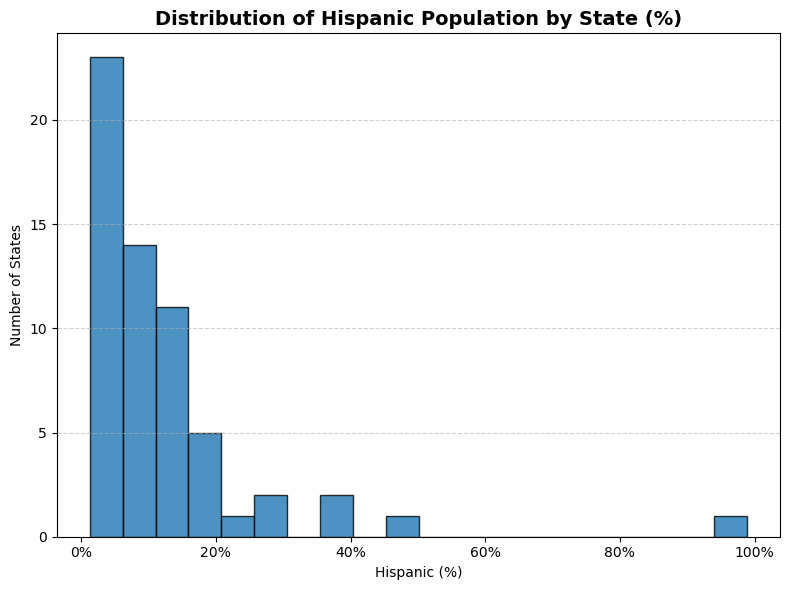

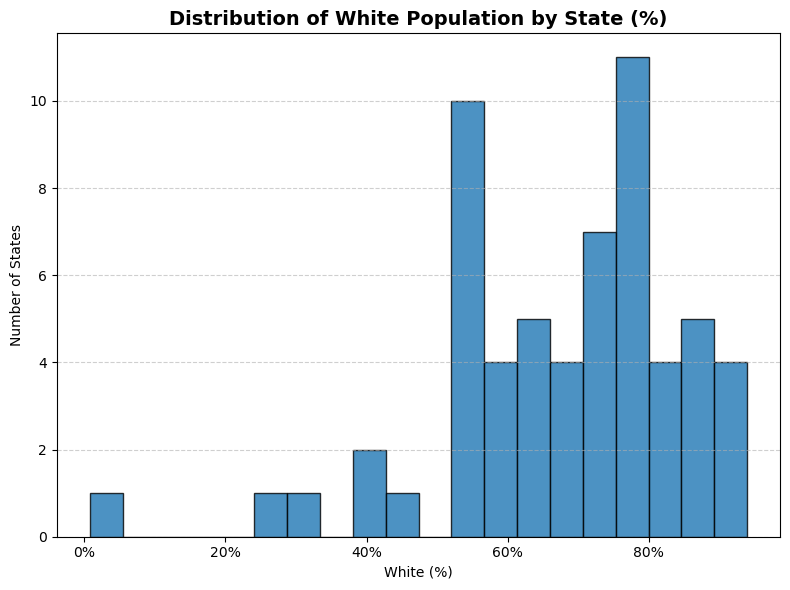

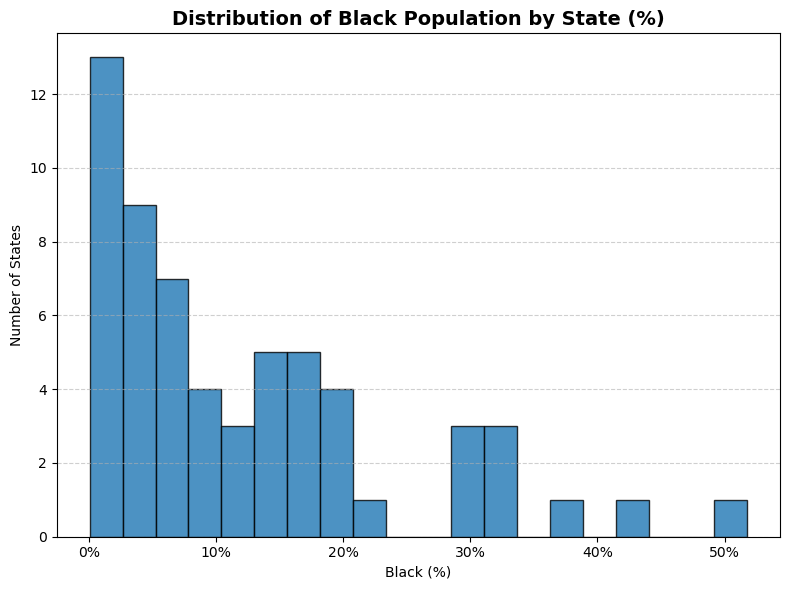

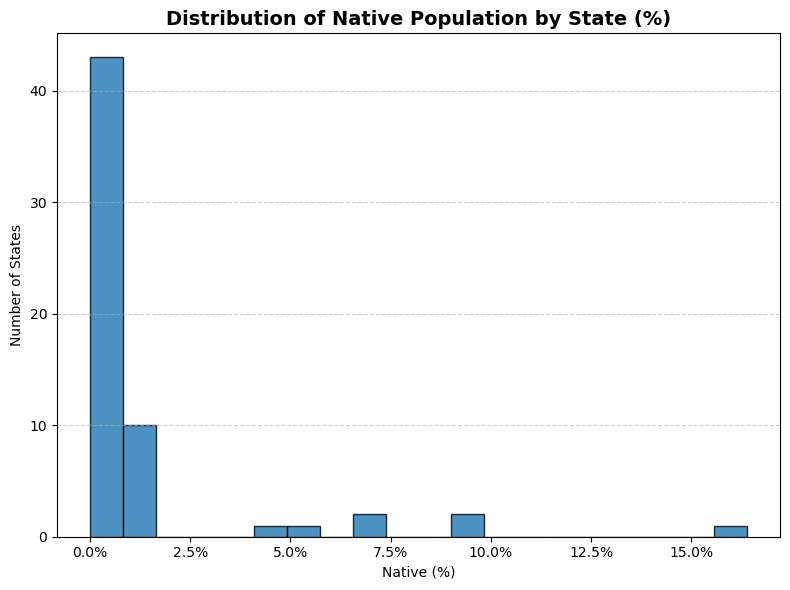

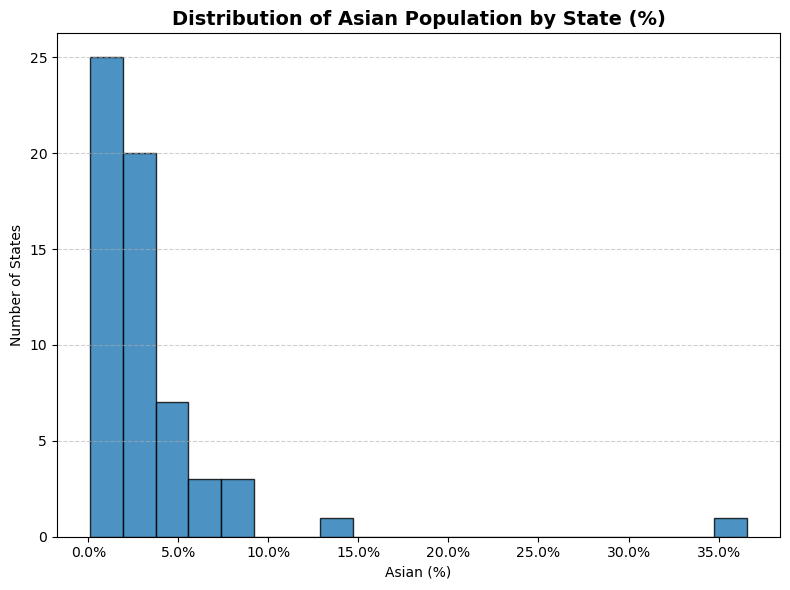

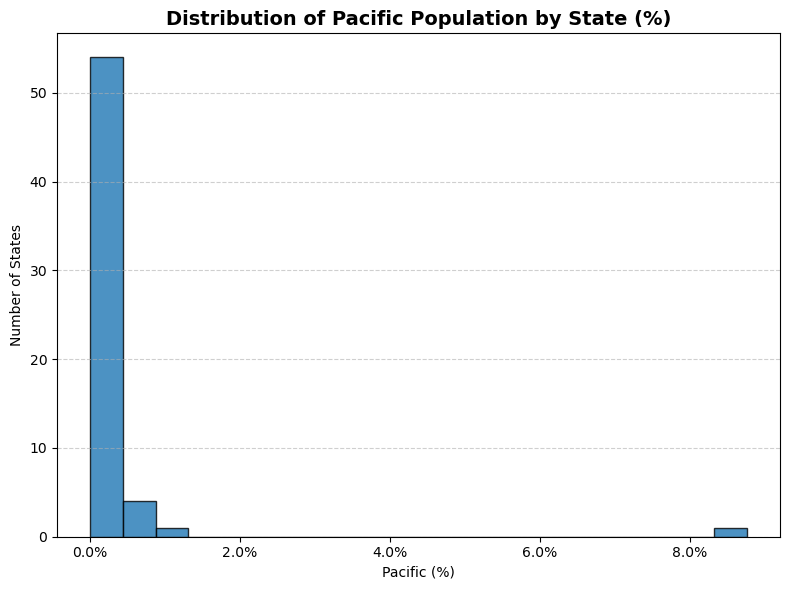

In [63]:
os.makedirs("figures", exist_ok=True)
for col in race_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(us_census[col], bins=20, alpha=0.8, edgecolor="black")
    plt.title(f"Distribution of {col} Population by State (%)", fontsize=14, weight="bold")
    plt.xlabel(f"{col} (%)")
    plt.ylabel("Number of States")
    plt.gca().xaxis.set_major_formatter(PercentFormatter())  # show % on x-axis (0–100)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    # save and/or show
    out = f"figures/hist_{col.lower()}.png"
    plt.savefig(out, dpi=150)
    plt.show()

Histogram of Race data